## Лабораторная работа №2

In [1]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score,roc_curve, classification_report, accuracy_score, precision_score, recall_score, f1_score, classification_report, confusion_matrix

import warnings
warnings.filterwarnings('ignore')

In [2]:
train_data = pd.read_csv("pistachio.csv")
train_data.head()

,AREA,PERIMETER,MAJOR_AXIS,MINOR_AXIS,ECCENTRICITY,EQDIASQ,SOLIDITY,CONVEX_AREA,EXTENT,ASPECT_RATIO,ROUNDNESS,COMPACTNESS,SHAPEFACTOR_1,SHAPEFACTOR_2,SHAPEFACTOR_3,SHAPEFACTOR_4,Class
0,73107,1161.8070,442.4074,217.7261,0.8705,305.0946,0.9424,77579,0.7710,2.0319,0.6806,0.6896,0.0061,0.0030,0.4756,0.9664,Kirmizi_Pistachio
1,89272,1173.1810,460.2551,251.9546,0.8369,337.1419,0.9641,92598,0.7584,1.8267,0.8151,0.7325,0.0052,0.0028,0.5366,0.9802,Siit_Pistachio
2,60955,999.7890,386.9247,209.1255,0.8414,278.5863,0.9465,64400,0.7263,1.8502,0.7663,0.7200,0.0063,0.0034,0.5184,0.9591,Kirmizi_Pistachio
3,79537,1439.5129,466.7973,221.2136,0.8806,318.2289,0.9437,84281,0.7568,2.1102,0.4823,0.6817,0.0059,0.0028,0.4648,0.9807,Kirmizi_Pistachio
4,96395,1352.6740,515.8730,246.5945,0.8784,350.3340,0.9549,100950,0.7428,2.0920,0.6620,0.6791,0.0054,0.0026,0.4612,0.9648,Kirmizi_Pistachio


In [3]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1718 entries, 0 to 1717
Data columns (total 17 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   AREA           1718 non-null   int64  
 1   PERIMETER      1718 non-null   float64
 2   MAJOR_AXIS     1718 non-null   float64
 3   MINOR_AXIS     1718 non-null   float64
 4   ECCENTRICITY   1718 non-null   float64
 5   EQDIASQ        1718 non-null   float64
 6   SOLIDITY       1718 non-null   float64
 7   CONVEX_AREA    1718 non-null   int64  
 8   EXTENT         1718 non-null   float64
 9   ASPECT_RATIO   1718 non-null   float64
 10  ROUNDNESS      1718 non-null   float64
 11  COMPACTNESS    1718 non-null   float64
 12  SHAPEFACTOR_1  1718 non-null   float64
 13  SHAPEFACTOR_2  1718 non-null   float64
 14  SHAPEFACTOR_3  1718 non-null   float64
 15  SHAPEFACTOR_4  1718 non-null   float64
 16  Class          1718 non-null   object 
dtypes: float64(14), int64(2), object(1)
memory usage: 22

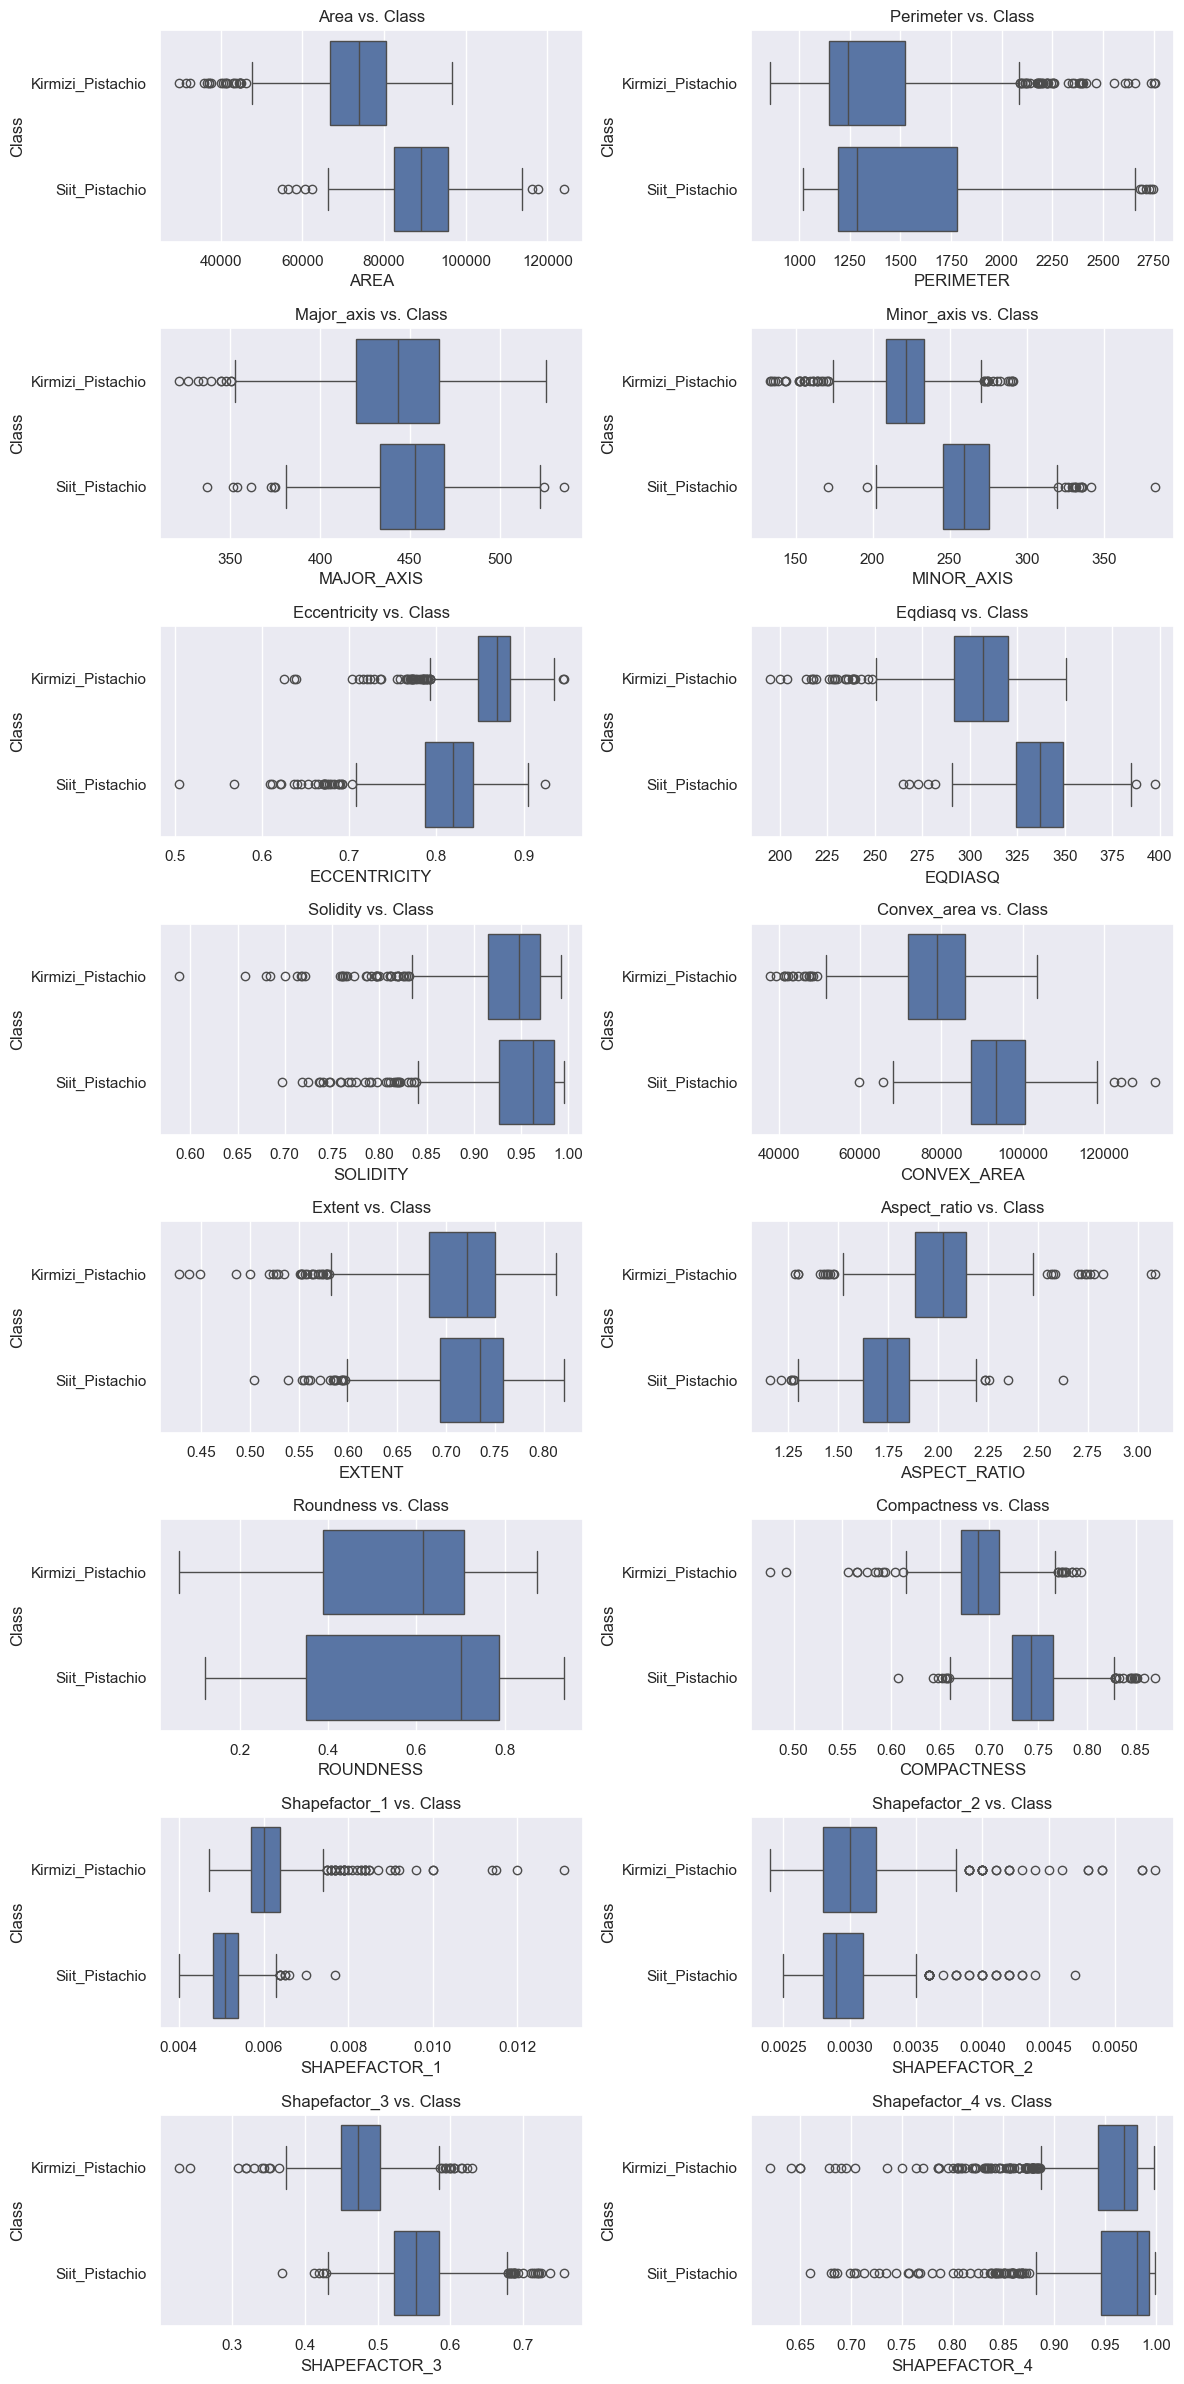

In [4]:
class RelationshipPlotter:
    
    def __init__(self, data):
        self.data = data
        self.fig, self.axes = plt.subplots(nrows=8, ncols=2, figsize=(12, 24))  
    
    def plot_box(self, row, col, x, y):
        ax = self.axes[row, col]  
        sns.boxplot(data=self.data, x=x, y=y, ax=ax)
        ax.set_title(f"{x.capitalize()} vs. {y.capitalize()}")

    def show_plots(self):
        plt.tight_layout() 
        plt.show()

columns_of_box = train_data.columns[:-1]
plotter = RelationshipPlotter(data=train_data)

for i, col in enumerate(columns_of_box):
    plotter.plot_box(i // 2, i % 2, x=col, y='Class')
plotter.show_plots()

In [5]:
def map_class_labels(data, mapping):
    data['Class'] = data['Class'].map(mapping)
    return data

mapping_class = {
    'Kirmizi_Pistachio': 0,
    'Siit_Pistachio': 1
}

train_data = map_class_labels(train_data, mapping_class)

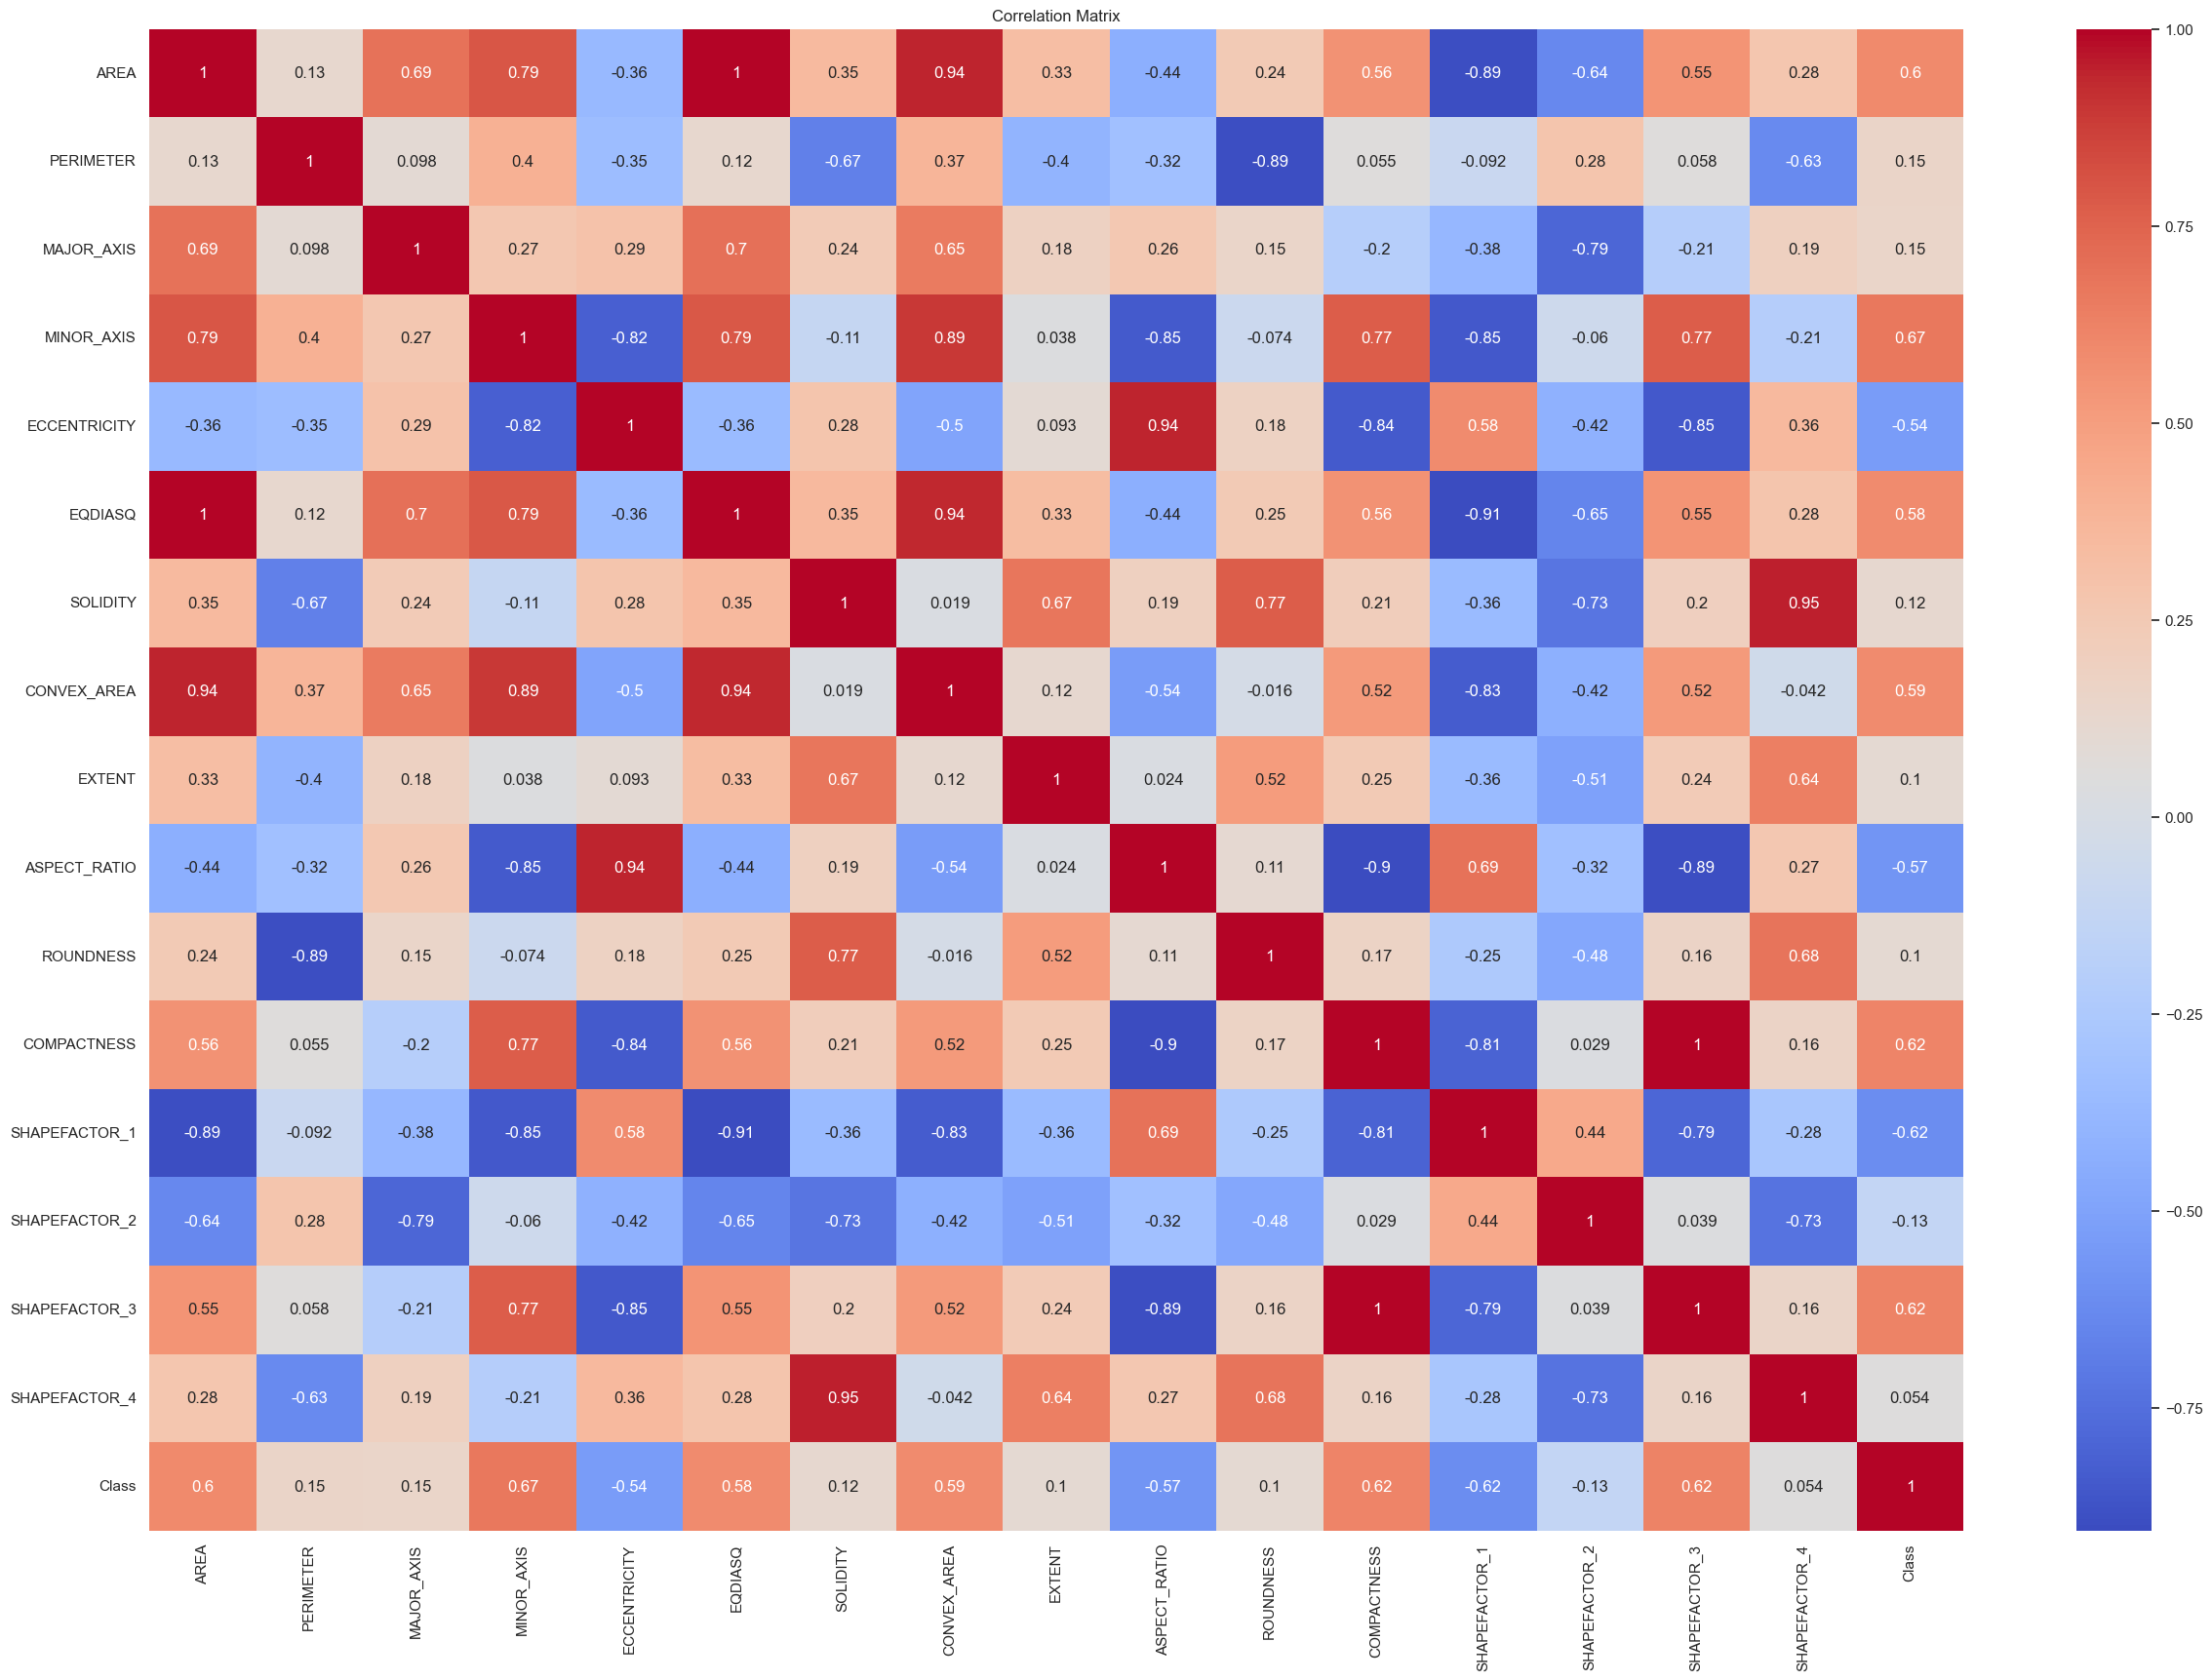

In [6]:
corr_matrix =train_data.corr()
fig, ax = plt.subplots(figsize=(30, 20))
sns.heatmap(corr_matrix, cmap='coolwarm', annot=True, ax=ax)
ax.set_title('Correlation Matrix')
plt.show()

In [7]:
Y= train_data['Class']
X= train_data.drop(columns=['Class'])
X_train, X_val, y_train, y_val = train_test_split(X,Y, test_size=0.2, shuffle=True)

In [8]:
scaler = StandardScaler()

X_V = X_val.values
scaled_x_train = scaler.fit_transform(X_train)
scaled_x_val = scaler.transform(X_V)

In [9]:
DecisionTree_hyperparameters = {
    'max_depth': [3, 5, 7, None],
    'min_samples_split': [2, 4, 6, 8],
    'min_samples_leaf': [1, 2, 3, 4],
    'criterion': ['gini', 'entropy']
}

RandomForest_hyperparameters = {
    'n_estimators': [100, 200, 300],
    'max_depth': [5, 10, None],
    'min_samples_split': [2, 4, 6],
    'min_samples_leaf': [1, 2, 3],
    'criterion': ['gini', 'entropy']
}

XGBoost_hyperparameters = {
    'max_depth': [3, 5, 7],
    'learning_rate': [0.1, 0.01, 0.001],
    'n_estimators': [100, 200, 300],
    'subsample': [0.8, 0.9, 1.0],
    'colsample_bytree': [0.8, 0.9, 1.0],
    'gamma': [0, 0.1, 0.2]
}

SVM_hyperparameters = {
    'C': [0.1, 1.0, 10.0],
    'kernel': ['linear', 'rbf', 'poly'],
    'gamma': ['scale', 'auto'],
    'degree': [2, 3, 4]
}

KNN_hyperparameters = {
    'n_neighbors': [3, 5, 7, 9],
    'weights': ['uniform', 'distance'],
    'metric': ['euclidean', 'manhattan']
}

LogisticRegression_hyperparameters = {
    'C': [0.1, 1.0, 10.0],
    'penalty': ['l1', 'l2'],
    'solver': ['liblinear', 'saga']
}

models = {
    'DecisionTree': DecisionTreeClassifier(),
    'RandomForest': RandomForestClassifier(),
    'XGBoost': XGBClassifier(),
    'SVM': SVC(),
    'KNN': KNeighborsClassifier(),
    'LogisticRegression': LogisticRegression()
}

for model_name, model in models.items():
    hyperparameters = eval(model_name + '_hyperparameters')
    grid_search = GridSearchCV(model, hyperparameters, cv=5)
    grid_search.fit(scaled_x_train, y_train)
    best_params = grid_search.best_params_
    best_score = grid_search.best_score_
    print(f"{model_name} Best Parameters: {best_params}")
    print(f"{model_name} Best Score: {best_score}")
    print("++++++++++++++++++++++++++++++++++++++++++++++++++++")

DecisionTree Best Parameters: {'criterion': 'gini', 'max_depth': 5, 'min_samples_leaf': 3, 'min_samples_split': 8}
DecisionTree Best Score: 0.8530086264100862
++++++++++++++++++++++++++++++++++++++++++++++++++++
RandomForest Best Parameters: {'criterion': 'gini', 'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 200}
RandomForest Best Score: 0.8748321167883212
++++++++++++++++++++++++++++++++++++++++++++++++++++
XGBoost Best Parameters: {'colsample_bytree': 1.0, 'gamma': 0, 'learning_rate': 0.01, 'max_depth': 3, 'n_estimators': 300, 'subsample': 0.8}
XGBoost Best Score: 0.8813855341738552
++++++++++++++++++++++++++++++++++++++++++++++++++++
SVM Best Parameters: {'C': 10.0, 'degree': 2, 'gamma': 'scale', 'kernel': 'rbf'}
SVM Best Score: 0.8792037159920371
++++++++++++++++++++++++++++++++++++++++++++++++++++
KNN Best Parameters: {'metric': 'euclidean', 'n_neighbors': 9, 'weights': 'distance'}
KNN Best Score: 0.8668214996682149
+++++++++++++++++++++++++++++

In [10]:
class ClassifierEvaluationPlot:
    def __init__(self, classifiers):
        self.classifiers = classifiers
        self.classifier_names = []
        self.accuracies = []
        self.precisions = []
        self.recalls = []
        self.f1_scores = []

    def evaluate_classifiers(self, pca_train, y_train, pca_test, y_test):
        from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

        for classifier in self.classifiers:
            classifier_name = type(classifier).__name__
            self.classifier_names.append(classifier_name)

            classifier.fit(pca_train, y_train)
            y_pred = classifier.predict(pca_test)

            accuracy = accuracy_score(y_test, y_pred)
            precision = precision_score(y_test, y_pred)
            recall = recall_score(y_test, y_pred)
            f1 = f1_score(y_test, y_pred)

            self.accuracies.append(accuracy)
            self.precisions.append(precision)
            self.recalls.append(recall)
            self.f1_scores.append(f1)

    def plot_evaluation_metrics(self):
        x = np.arange(len(self.classifier_names))
        width = 0.2
        sns.set_style('darkgrid')
        fig, ax = plt.subplots(figsize=(15, 10))
        rects1 = ax.bar(x - 1.5 * width, self.accuracies, width, label='Accuracy')
        rects2 = ax.bar(x - 0.5 * width, self.precisions, width, label='Precision')
        rects3 = ax.bar(x + 0.5 * width, self.recalls, width, label='Recall')
        rects4 = ax.bar(x + 1.5 * width, self.f1_scores, width, label='F1 Score')

        ax.set_ylabel('Score')
        ax.set_title('Evaluation Metrics for Classifiers')
        ax.set_xticks(x)
        ax.set_xticklabels(self.classifier_names, rotation=45, ha="right")
        ax.legend(loc='lower right')

        def autolabel(rects):
            for rect in rects:
                height = rect.get_height()
                ax.annotate(f'{height:.2f}', xy=(rect.get_x() + rect.get_width() / 2, height), xytext=(0, 3),
                            textcoords="offset points", ha='center', va='bottom')

        autolabel(rects1)
        autolabel(rects2)
        autolabel(rects3)
        autolabel(rects4)

        plt.tight_layout()
        plt.show()

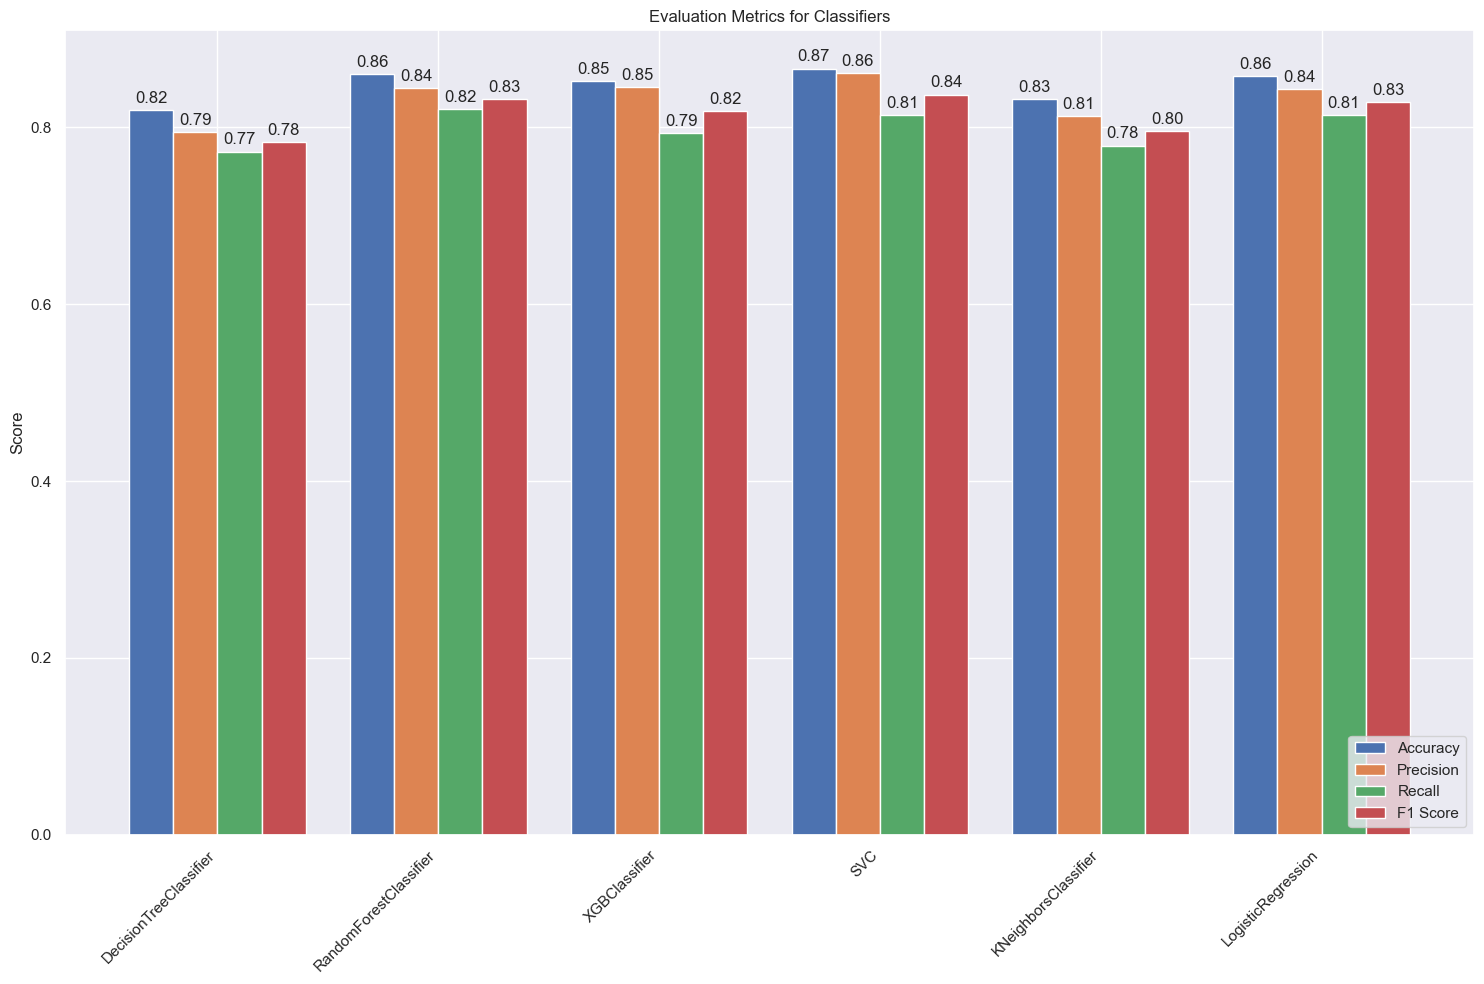

In [11]:
classifiers_with_default_values = [
    DecisionTreeClassifier(),
    RandomForestClassifier(),
    XGBClassifier(),
    SVC(),
    KNeighborsClassifier(),
    LogisticRegression()
]

evaluation_plot = ClassifierEvaluationPlot(classifiers_with_default_values)
evaluation_plot.evaluate_classifiers(scaled_x_train, y_train, scaled_x_val, y_val)
evaluation_plot.plot_evaluation_metrics()

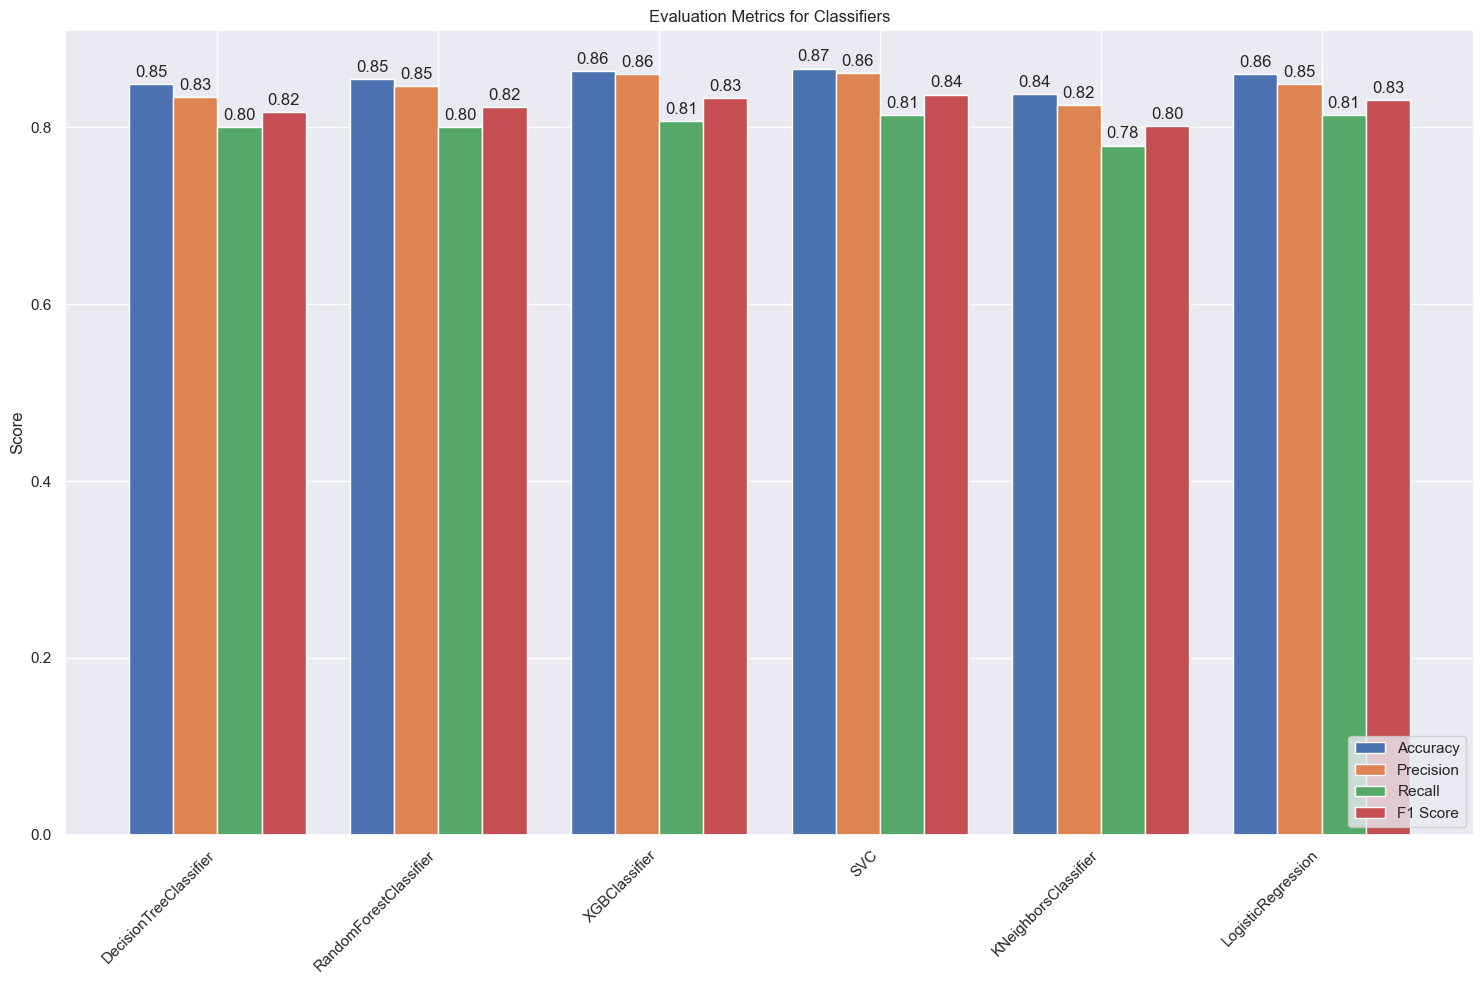

In [12]:
classifiers_with_best_hyperparameters = [
    DecisionTreeClassifier(criterion = 'gini' ,max_depth = 5, min_samples_leaf = 2,min_samples_split = 4, random_state=42),
    RandomForestClassifier(criterion = 'entropy', max_depth= 10, min_samples_leaf= 2, min_samples_split= 6, n_estimators= 200 , random_state=42),
    XGBClassifier(colsample_bytree= 1.0, gamma= 0.2, learning_rate= 0.01, max_depth= 7, n_estimators= 300, subsample= 1.0, random_state=42 ),
    SVC(C= 1.0, degree= 2, gamma='scale', kernel= 'rbf', random_state=42),
    KNeighborsClassifier(metric= 'euclidean',n_neighbors= 9,weights= 'distance'),
    LogisticRegression(C= 10.0, penalty='l1', solver= 'liblinear', random_state=42)
]

evaluation_plot = ClassifierEvaluationPlot(classifiers_with_best_hyperparameters)
evaluation_plot.evaluate_classifiers(scaled_x_train, y_train, scaled_x_val, y_val)
evaluation_plot.plot_evaluation_metrics()

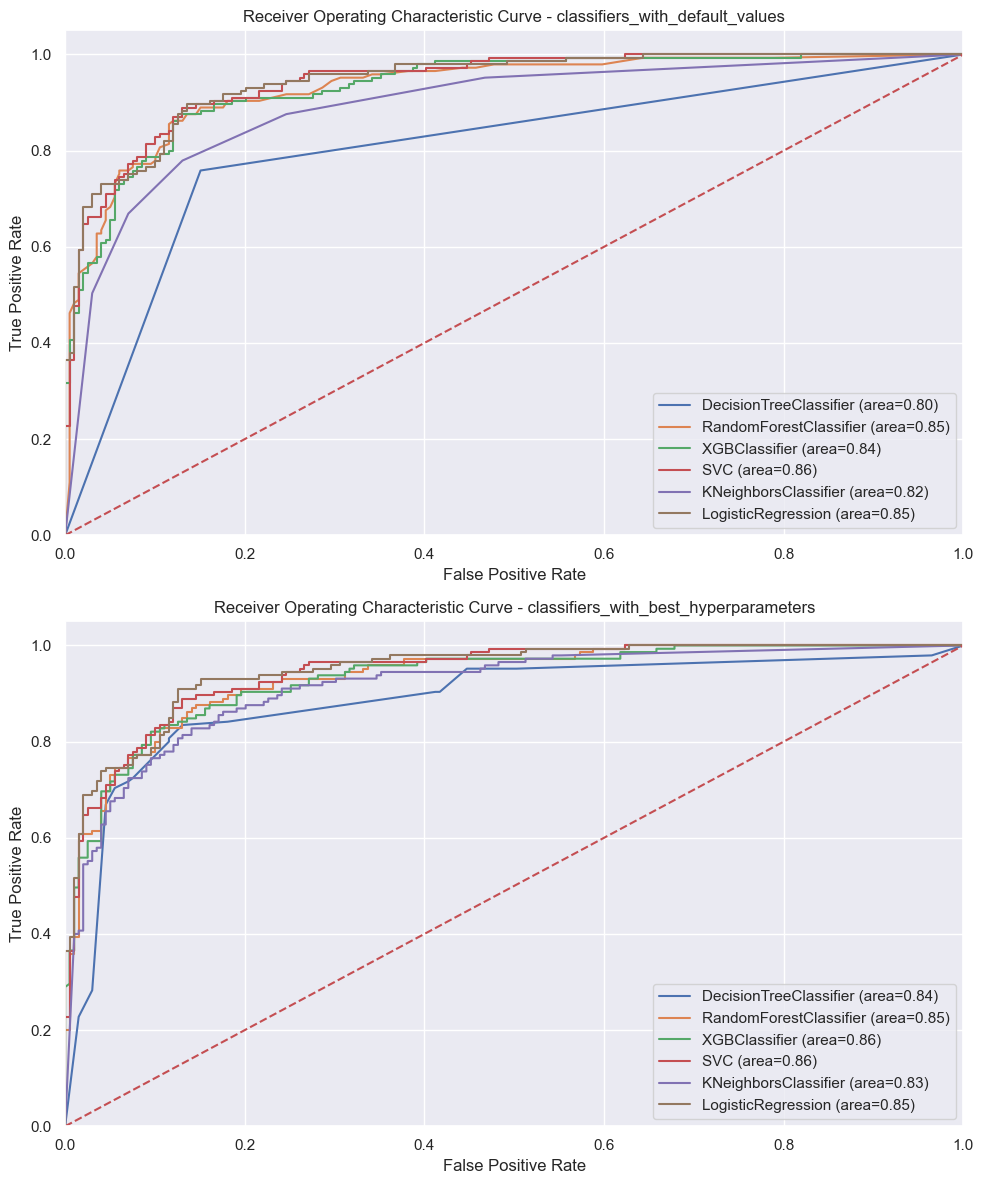

In [13]:
fig, axes = plt.subplots(nrows=2, figsize=(10, 12))

for i, cl in enumerate([classifiers_with_default_values, classifiers_with_best_hyperparameters]):
    ax = axes[i]
    cl_name = "classifiers_with_default_values" if i == 0 else "classifiers_with_best_hyperparameters"

    for classifier in cl:
        classifier.fit(scaled_x_train, y_train)
        y_pred = classifier.predict(scaled_x_val)
        roc_auc = roc_auc_score(y_val, y_pred)

        try:
            y_scores = classifier.predict_proba(scaled_x_val)[:, 1]
        except AttributeError:
            y_scores = classifier.decision_function(scaled_x_val)

        fpr, tpr, thresholds = roc_curve(y_val, y_scores)
        ax.plot(fpr, tpr, label=f'{type(classifier).__name__} (area={roc_auc:.2f})')

    ax.plot([0, 1], [0, 1], 'r--')
    ax.set_xlim([0.0, 1.0])
    ax.set_ylim([0.0, 1.05])
    ax.set_xlabel('False Positive Rate')
    ax.set_ylabel('True Positive Rate')
    ax.set_title(f'Receiver Operating Characteristic Curve - {cl_name}')
    ax.legend(loc='lower right')

plt.tight_layout()
plt.show()

              precision    recall  f1-score   support

           0       0.87      0.90      0.88       199
           1       0.86      0.81      0.83       145

    accuracy                           0.86       344
   macro avg       0.86      0.86      0.86       344
weighted avg       0.86      0.86      0.86       344

Confusion Matrix : 
 [[180  19]
 [ 28 117]]
Sensitivity :  0.9045226130653267
Specificity :  0.8068965517241379
f1 score: 0.8327402135231317


<Axes: >

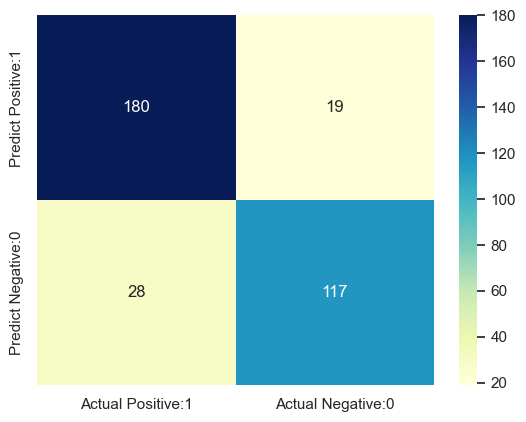

In [14]:
Final_Model = XGBClassifier(colsample_bytree= 1.0, gamma= 0.2, learning_rate= 0.01, max_depth= 7, n_estimators= 300, subsample= 1.0, random_state=42 )
Final_Model.fit(scaled_x_train, y_train)
y_pred = Final_Model.predict(scaled_x_val)

print(classification_report(y_val,y_pred))
cm = confusion_matrix(y_val, y_pred)
print('Confusion Matrix : \n', cm)
total=sum(sum(cm))
sensitivity = cm[0,0]/(cm[0,0]+cm[0,1])
print('Sensitivity : ', sensitivity )
specificity = cm[1,1]/(cm[1,0]+cm[1,1])
print('Specificity : ', specificity)
print('f1 score:', f1_score(y_val, y_pred))

cm_matrix = pd.DataFrame(data=cm, columns=['Actual Positive:1', 'Actual Negative:0'], index=['Predict Positive:1', 'Predict Negative:0'])
sns.heatmap(cm_matrix, annot=True, fmt='d', cmap='YlGnBu')